In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib agg

import jax
import jax.numpy as jnp
import visualization
from utils import results, experiments, settings, equioutput, evaluation, graphs
from numpyro import distributions
import matplotlib.pyplot as plt
rng_key = jax.random.PRNGKey(0)

In [2]:
def plot_data_spectrum(samples, eigenvalues):
    figure = plt.figure(figsize=(12, 4))
    ax1 = figure.add_subplot(1, 2, 1)
    for i in range(samples.shape[-1]):
        ax1.scatter(samples[:, i], jnp.ones_like(samples[:, i]))
    ax2 = figure.add_subplot(1, 2, 2)
    ax2.scatter(jnp.arange(len(eigenvalues[:16])), eigenvalues[:16])
    return figure

# std: 0.1

100%|█████████████████████████████████████████████████████████████| 512/512 [00:01<00:00, 470.38it/s]


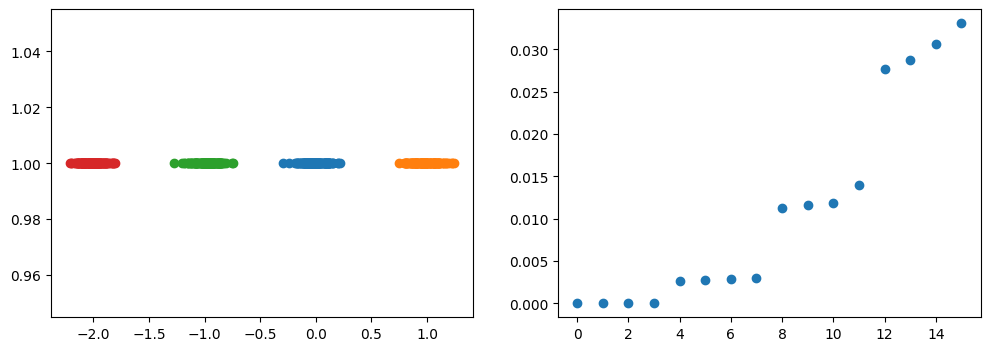

In [27]:
normals = distributions.Normal(jnp.array([0.0, 1.0, -1.0, -2.0]), jnp.ones(4) * 0.1)
rng_key, rng_key_ = jax.random.split(rng_key)
samples = normals.sample(rng_key_, (128, ))

# graph
a = graphs.knn_graph_dense(nodes=samples.reshape((-1, 1)), k=10)
d = graphs.degree_matrix(a)
l = graphs.laplacian(a, d)
eigenvalues, eigenvectors = graphs.spectrum(l, k=32, normalized=False)

#plot
plot_data_spectrum(samples, eigenvalues)

(31,)
[-4.32147917e-09 -4.44529746e-10 -2.63529224e-03  2.47888453e-03
  6.42438681e-05 -4.45405458e-05 -8.12565256e-03  7.95076322e-03
  4.76961432e-05 -1.87445898e-03 -1.15840863e-02  1.26820514e-02
 -8.91733216e-04 -4.74403612e-04 -1.25589855e-02  9.59470123e-03
  4.32194117e-03 -4.71050106e-03 -1.01075741e-03  5.40177478e-03
 -2.07926538e-02  1.39346467e-02  4.57644928e-04  3.39057995e-03
 -1.20773902e-02  5.66027127e-03 -1.17470901e-02  1.27097219e-02
  9.67913121e-03 -1.78598203e-02]


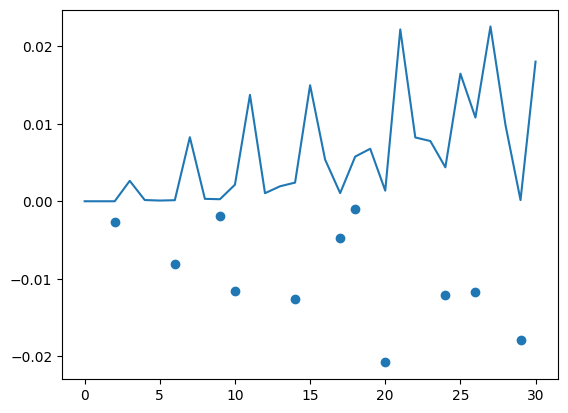

In [39]:
eigenvalue_differences = jnp.abs(eigenvalues[:-1] - eigenvalues[1:])
print(eigenvalue_differences.shape)
second_derivative = eigenvalue_differences[:-1] - eigenvalue_differences[1:]
sd_positions = jnp.argwhere(second_derivative < -1e-3).squeeze()
print(second_derivative)

figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
ax.plot(jnp.arange(len(eigenvalue_differences)), eigenvalue_differences)
ax.scatter(sd_positions, second_derivative[sd_positions])
figure

# std: 0.15

100%|█████████████████████████████████████████████████████████████| 512/512 [00:00<00:00, 583.19it/s]


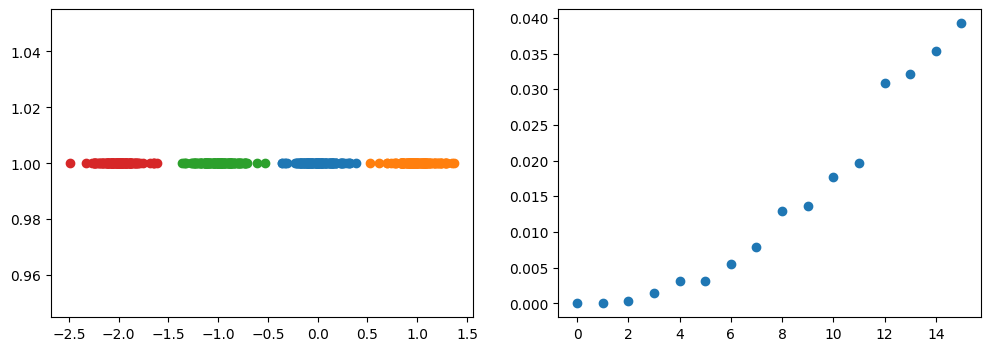

In [40]:
normals = distributions.Normal(jnp.array([0.0, 1.0, -1.0, -2.0]), jnp.ones(4) * 0.15)
rng_key, rng_key_ = jax.random.split(rng_key)
samples = normals.sample(rng_key_, (128, ))

# graph
a = graphs.knn_graph_dense(nodes=samples.reshape((-1, 1)), k=10)
d = graphs.degree_matrix(a)
l = graphs.laplacian(a, d)
eigenvalues, eigenvectors = graphs.spectrum(l, k=32, normalized=False)

#plot
plot_data_spectrum(samples, eigenvalues)

(31,)
[-3.3316293e-04 -7.8896142e-04 -5.0110940e-04  1.5937052e-03
 -2.3722844e-03  8.2751736e-05 -2.7881872e-03  4.3825964e-03
 -3.3366836e-03  2.0630388e-03 -9.1655683e-03  9.9185389e-03
 -2.0376306e-03 -5.5264751e-04 -5.0921347e-03  2.5011785e-04
  6.5020854e-03 -8.6457701e-04 -1.5914142e-02  7.2073275e-03
 -8.9104949e-03  1.6826021e-02 -4.0050801e-03  6.3147871e-03
 -2.1426223e-02  1.7467937e-02 -2.4993112e-04 -3.5920918e-02
  3.3416778e-02  6.9174161e-03]


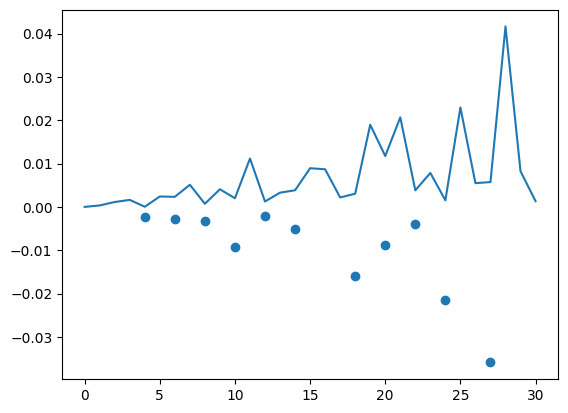

In [41]:
eigenvalue_differences = jnp.abs(eigenvalues[:-1] - eigenvalues[1:])
print(eigenvalue_differences.shape)
second_derivative = eigenvalue_differences[:-1] - eigenvalue_differences[1:]
sd_positions = jnp.argwhere(second_derivative < -1e-3).squeeze()
print(second_derivative)

figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
ax.plot(jnp.arange(len(eigenvalue_differences)), eigenvalue_differences)
ax.scatter(sd_positions, second_derivative[sd_positions])
figure

# std: 0.2

100%|█████████████████████████████████████████████████████████████| 512/512 [00:00<00:00, 554.51it/s]


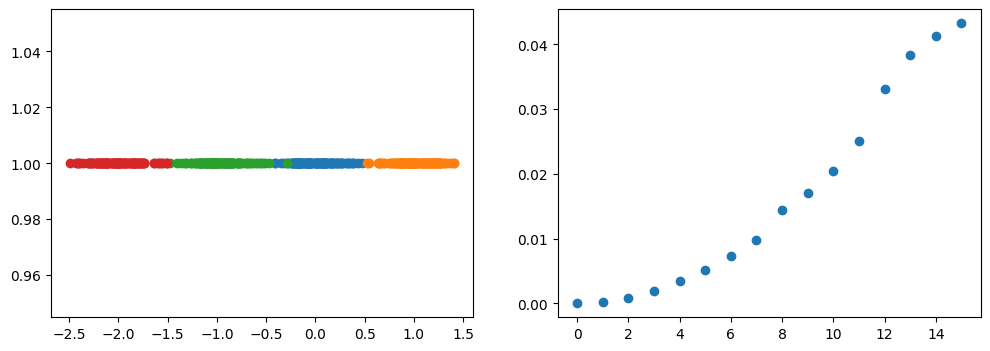

In [44]:
normals = distributions.Normal(jnp.array([0.0, 1.0, -1.0, -2.0]), jnp.ones(4) * 0.2)
rng_key, rng_key_ = jax.random.split(rng_key)
samples = normals.sample(rng_key_, (128, ))

# graph
a = graphs.knn_graph_dense(nodes=samples.reshape((-1, 1)), k=10)
d = graphs.degree_matrix(a)
l = graphs.laplacian(a, d)
eigenvalues, eigenvectors = graphs.spectrum(l, k=32, normalized=False)

#plot
plot_data_spectrum(samples, eigenvalues)

(31,)
[-0.00039485 -0.00053212 -0.00026322 -0.00043163 -0.00030772 -0.00030827
 -0.00209948  0.00187491 -0.0007548  -0.0012038  -0.00335734  0.00280873
  0.00216531  0.00108661 -0.01045439  0.00211453  0.00586531 -0.00309703
 -0.00570381  0.01109995 -0.00982175  0.00957132 -0.00670858 -0.00285613
 -0.00299175  0.01164776 -0.00078093 -0.03121719  0.02725768 -0.02193844]


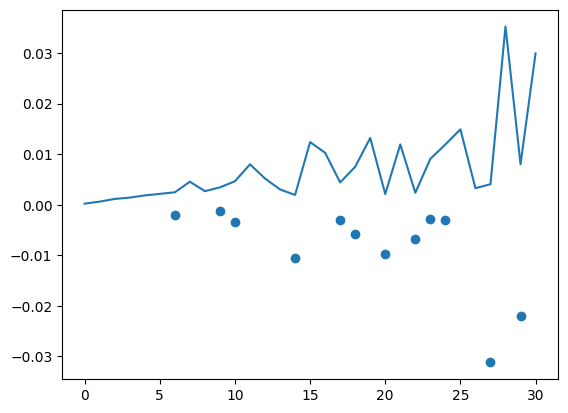

In [45]:
eigenvalue_differences = jnp.abs(eigenvalues[:-1] - eigenvalues[1:])
print(eigenvalue_differences.shape)
second_derivative = eigenvalue_differences[:-1] - eigenvalue_differences[1:]
sd_positions = jnp.argwhere(second_derivative < -1e-3).squeeze()
print(second_derivative)

figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
ax.plot(jnp.arange(len(eigenvalue_differences)), eigenvalue_differences)
ax.scatter(sd_positions, second_derivative[sd_positions])
figure